Data Collection

In [ ]:
# Step 1: Clone the repository
!git clone https://github.com/KabirAhmad4/KICS--Text-Classification---NLP.git





Cloning into 'KICS--Text-Classification---NLP'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 938.17 KiB | 11.73 MiB/s, done.


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Data Loading in Pandas df

In [ ]:
df = pd.read_csv(r"/content/KICS--Text-Classification---NLP/dataset/train.csv")
df

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


View Data Information


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [ ]:
data.shape

(1000, 3)

# Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Topic'] = label_encoder.fit_transform(df['Topic'])

In [ ]:
df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,0
1,0xbf0,Is it so hard to believe that there exist part...,2
2,0x1dfc,There are bees,0
3,0xc7e,I'm a medication technician. And that's alot o...,0
4,0xbba,Cesium is such a pretty metal.,1


# Feature Extraction

In [ ]:
docs = list(data['Comment'])

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)

tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)

In [ ]:
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
print(docs)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Features

In [ ]:
X = docs

# Target

In [ ]:
y = data['Topic']

# Data Splitting

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,
                                               random_state=101)

In [ ]:

print('Training samples:', X_train.shape)
print('Testing sample_data:',y_train.shape)

Training samples: (800, 5813)
Testing sample_data: (800,)


# Model building

In [ ]:
model = LogisticRegression()

# Model Training

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

# Predictions

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy score:",accuracy_score(y_test, y_pred))

Testing Accuracy score: 0.5


# Model Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Biology       0.47      0.77      0.59        84
   Chemistry       0.52      0.31      0.39        70
     Physics       0.65      0.28      0.39        46

    accuracy                           0.50       200
   macro avg       0.55      0.46      0.46       200
weighted avg       0.53      0.50      0.47       200



<Axes: >

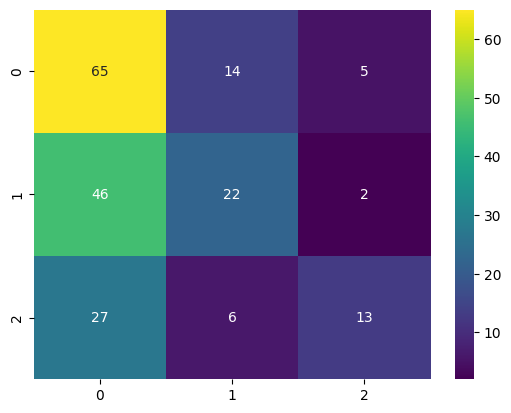

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'viridis', annot = True)